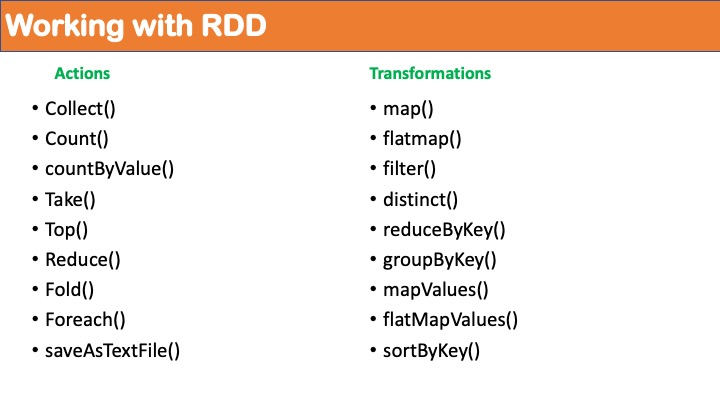

In [4]:
from IPython.display import Image
Image(filename='RDD_Actions_Transformations.jpg')

In [9]:
from pyspark import SparkContext, SparkConf
sc = SparkContext()

In [ ]:
data = sc.parallelize([1,2,3,4,5])

In [12]:
data = sc.parallelize([(1,2),(3,4),(3,6),(3,4)])
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [13]:
type(data)

pyspark.rdd.RDD

In [14]:
data.count()

4

In [15]:
data.countByValue()

defaultdict(int, {(1, 2): 1, (3, 4): 2, (3, 6): 1})

In [16]:
dataStr = sc.parallelize([(1,'mike'),(2,'john'),(3,'rambo'),(4,'bill')])
dataStr.collect()

[(1, 'mike'), (2, 'john'), (3, 'rambo'), (4, 'bill')]

In [17]:
dataStr.count()

4

In [21]:
dataStr.countByValue()

defaultdict(int,
            {(1, 'mike'): 1, (2, 'john'): 1, (3, 'rambo'): 1, (3, 'bill'): 1})

In [5]:
data.top(2)

[(3, 6), (3, 4)]

In [18]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [6]:
data.sortByKey().collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [7]:
# lookup : Return all value associated with the given key.
data.lookup(3)

[4, 6, 4]

In [8]:
data.keys().collect()

[1, 3, 3, 3]

In [9]:
data.values().collect()

[2, 4, 6, 4]

In [10]:
data.mapValues(lambda a : a*a).collect()

[(1, 4), (3, 16), (3, 36), (3, 16)]

In [11]:
# data.map()  no use in Key value
# data.reduce()  no use in Key value

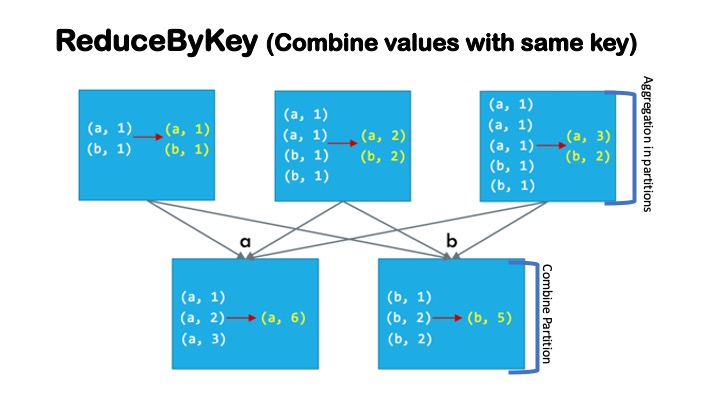

In [5]:
Image(filename='ReduceByKey.jpg')

In [19]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [20]:
data.reduceByKey(lambda x, y : x+y).collect()

[(1, 2), (3, 14)]

In [21]:
data.reduceByKey(max).collect()

[(1, 2), (3, 6)]

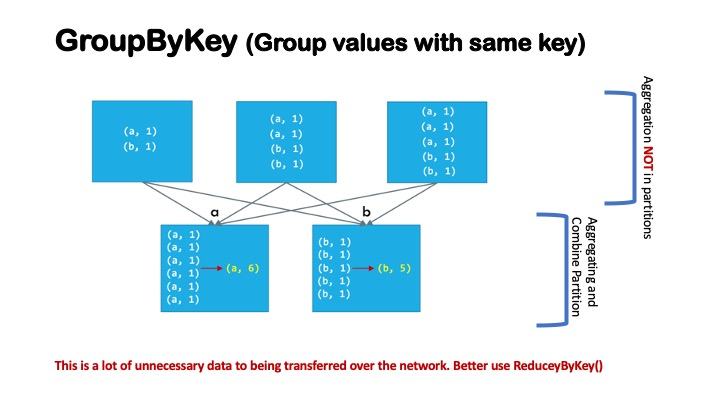

In [6]:
Image(filename='GroupByKey.jpg')

In [27]:
# groupBy: This transformation groups all the rows with the same key into a single row.
result = data.groupByKey().collect()

In [28]:
result

[(1, <pyspark.resultiterable.ResultIterable at 0x1a4b23c4048>),
 (3, <pyspark.resultiterable.ResultIterable at 0x1a4b23c4bc8>)]

In [29]:
for (k,v) in result:
    print(k, list(v))

1 [2]
3 [4, 6, 4]


In [30]:
aa = data.groupByKey().mapValues(sum)

In [31]:
aa.collect()

[(1, 2), (3, 14)]

In [32]:
bb = data.groupByKey().mapValues(max)

In [33]:
bb.collect()

[(1, 2), (3, 6)]

In [34]:
# reduceByKey = gropupByKey().mapValues(), then what is the difference ??

In [35]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [36]:
data.flatMapValues(lambda x: range(1, x)).collect()

[(1, 1),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 1),
 (3, 2),
 (3, 3)]

In [37]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [38]:
data2 = sc.parallelize([(3,9)])
data2.collect()

[(3, 9)]

In [39]:
data.subtractByKey(data2).collect()

[(1, 2)]

In [40]:
data2.subtractByKey(data).collect()

[]

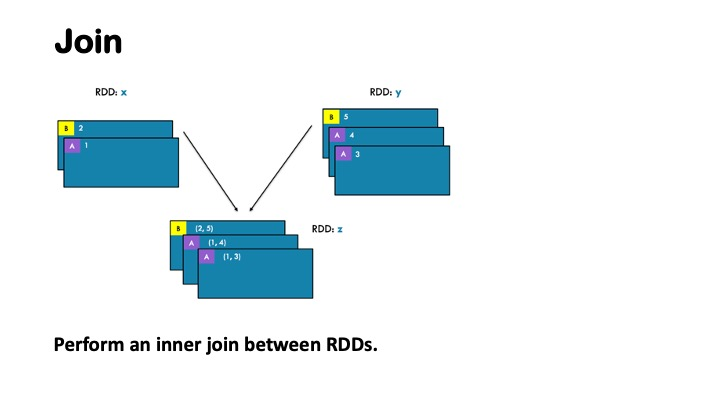

In [41]:
Image(filename='Join.jpg')

In [47]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [43]:
data2 = sc.parallelize([(3,9),(4,15)])
data2.collect()

[(3, 9), (4, 15)]

In [44]:
data.join(data2).collect()

[(3, (4, 9)), (3, (6, 9)), (3, (4, 9))]

In [48]:
data2.join(data).collect()

[(3, (9, 4)), (3, (9, 6)), (3, (9, 4))]

In [45]:
# rightOuterJoin: Perform a join between two RDDs where key must be present 
# in the first RDD.
data.rightOuterJoin(data2).collect()

[(3, (4, 9)), (3, (6, 9)), (3, (4, 9)), (4, (None, 15))]

In [49]:
data2.rightOuterJoin(data).collect()

[(1, (None, 2)), (3, (9, 4)), (3, (9, 6)), (3, (9, 4))]

In [46]:
# leftOuterJoin: Perform a join between two RDDs where key must 
# be present in the OTHER RDD.
data.leftOuterJoin(data2).collect()

[(1, (2, None)), (3, (4, 9)), (3, (6, 9)), (3, (4, 9))]

In [50]:
data2.leftOuterJoin(data).collect()

[(3, (9, 4)), (3, (9, 6)), (3, (9, 4)), (4, (15, None))]

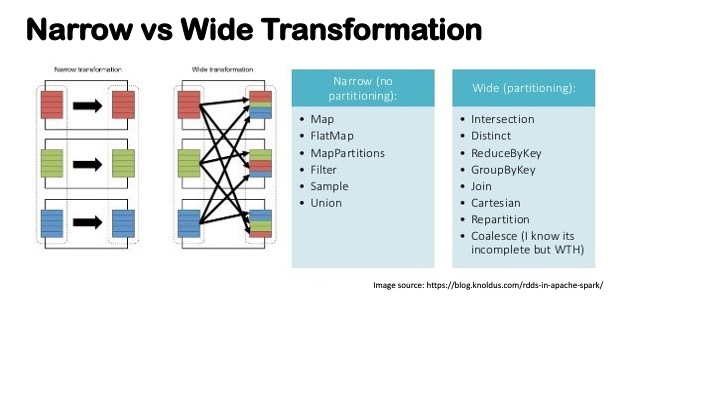

In [37]:
Image(filename='Narrow_Wide.jpg')

In [8]:
sc.stop()